In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
mvid = pd.read_csv("MVID_101001_171001.txt")
sber = pd.read_csv("SBER_101001_171001.txt")

In [3]:
sber.head()

,<TICKER>,<PER>,<DATE>,<TIME>,<CLOSE>,<VOL>
0,SBER,D,20101001,0,89.09,332429890
1,SBER,D,20101004,0,89.88,194032721
2,SBER,D,20101005,0,91.97,198775753
3,SBER,D,20101006,0,91.20,210406027
4,SBER,D,20101007,0,90.40,145137617


In [4]:
a = pd.merge(sber, mvid, on='<DATE>')

In [5]:
a.head()

,<TICKER>_x,<PER>_x,<DATE>,<TIME>_x,<CLOSE>_x,<VOL>_x,<TICKER>_y,<PER>_y,<TIME>_y,<CLOSE>_y,<VOL>_y
0,SBER,D,20101001,0,89.09,332429890,MVID,D,0,194.38,19406
1,SBER,D,20101004,0,89.88,194032721,MVID,D,0,190.00,31039
2,SBER,D,20101005,0,91.97,198775753,MVID,D,0,187.00,17651
3,SBER,D,20101006,0,91.20,210406027,MVID,D,0,190.04,36482
4,SBER,D,20101007,0,90.40,145137617,MVID,D,0,199.85,204248


In [6]:
x = a['<CLOSE>_x']
y = a['<CLOSE>_y']

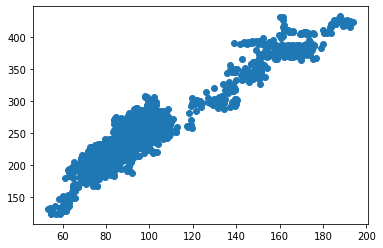

In [7]:
plt.figure()
plt.scatter(x, y)

In [8]:
class hypothesis():
	def __init__(self):
		self.b0 = 0
		self.b1 = 1

	def predict(self, x):
		return self.b0 + self.b1 * x

	def error(self, X, Y):
		return sum((self.predict(X) - Y) ** 2) / (2*len(X))

	def BGD(self, x, y):
		alpha = 0.00005
		d0 = sum(self.predict(x) - y) / len(x)
		d1 = (sum(self.predict(x) - y) * x) / len(x)

		self.b0 -= alpha * d0
		self.b1 -= alpha * d1

In [9]:
instance = hypothesis()
print(instance.predict(0))
print(instance.predict(100))

0
100
